In [1]:
from numpy.random import seed
from tensorflow import set_random_seed
import random

seed(485)
set_random_seed(485)
random.seed(485)

In [0]:
import pandas as pd
import numpy as np
import tensorflow

In [3]:
df = pd.read_csv('/content/rileyPlays.csv')
df

,home_game,score_differential,oneScoreGame,period,seconds_remaining,secondsInHalf,yard50,yardsToGoal,down,distance,yards_gained,year,play_type
0,True,-4,True,1,3157,1357,3,3,4,3,20,2018,FG
1,True,3,True,1,3423,1623,3,3,4,3,20,2015,FG
2,True,3,True,2,2617,817,4,4,4,4,21,2018,FG
3,True,21,False,4,278,278,4,4,4,4,22,2016,FG
4,True,44,False,4,777,777,5,5,4,5,22,2018,FG
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10311,False,-21,False,3,1540,1540,13,13,1,10,4,2018,Rush
10312,False,-18,False,4,595,595,12,12,1,10,1,2018,Rush
10313,False,-21,False,2,2280,480,10,10,2,6,1,2018,Rush
10314,False,-11,False,4,263,263,8,8,1,8,8,2018,Rush


https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.iloc.html

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

https://stackoverflow.com/questions/37292872/how-can-i-one-hot-encode-in-python **super important for encoding function**

In [4]:
from sklearn.model_selection import train_test_split

X = df.iloc[:,0:11]
y = df.iloc[:,12]

X = X.replace({True:1, False:0})
X

,home_game,score_differential,oneScoreGame,period,seconds_remaining,secondsInHalf,yard50,yardsToGoal,down,distance,yards_gained
0,1,-4,1,1,3157,1357,3,3,4,3,20
1,1,3,1,1,3423,1623,3,3,4,3,20
2,1,3,1,2,2617,817,4,4,4,4,21
3,1,21,0,4,278,278,4,4,4,4,22
4,1,44,0,4,777,777,5,5,4,5,22
...,...,...,...,...,...,...,...,...,...,...,...
10311,0,-21,0,3,1540,1540,13,13,1,10,4
10312,0,-18,0,4,595,595,12,12,1,10,1
10313,0,-21,0,2,2280,480,10,10,2,6,1
10314,0,-11,0,4,263,263,8,8,1,8,8


In [5]:
def oheAndReplace(original_dataframe, feature_to_encode):
    dummies = pd.get_dummies(original_dataframe[[feature_to_encode]])
    res = pd.concat([original_dataframe, dummies], axis=1)
    res = res.drop([feature_to_encode], axis=1)
    return(res)

from keras.utils import to_categorical
#y = y.to_frame()
#y = oheAndReplace(y, 'play_type')
y = y.replace({'Rush':0, 'Pass':1, 'FG':2, 'Punt':3})
y = to_categorical(y)
y

Using TensorFlow backend.


array([[0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.]], dtype=float32)

In [0]:
X_train, X_val_test, y_train, y_val_test = train_test_split(X, y, test_size=0.15)
X_validation, X_test, y_validation, y_test = train_test_split(X_val_test, y_val_test, test_size=0.5)

https://stackoverflow.com/questions/38420847/apply-standardscaler-to-parts-of-a-data-set

In [7]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
numeric = ['score_differential', 'period', 'seconds_remaining', 'secondsInHalf', 'yard50', 'yardsToGoal', 'down', 'distance', 'yards_gained']

scaled_features = X_train.copy()
features = scaled_features[numeric]
scaler = ss.fit(features.values)
features = ss.transform(features.values)

scaled_features[numeric] = features

X_train = scaled_features
X_train

,home_game,score_differential,oneScoreGame,period,seconds_remaining,secondsInHalf,yard50,yardsToGoal,down,distance,yards_gained
8892,0,-0.978763,0,-0.430953,0.085116,-1.472092,0.468111,0.662973,1.164865,-0.364955,0.133845
1824,1,-0.458560,1,-0.430953,0.114577,-1.414304,0.697500,-0.425685,-0.923366,0.372016,-0.634411
8924,0,0.451796,0,0.449018,-0.738860,0.267116,-0.602375,1.227463,-0.923366,0.372016,1.243548
6187,1,0.191694,1,-1.310923,1.317753,0.945649,0.162258,-0.707929,-0.923366,0.372016,-0.549049
1581,1,-0.003382,1,-0.430953,0.832111,-0.006907,-0.525912,-1.070816,0.120750,-1.101926,-0.634411
...,...,...,...,...,...,...,...,...,...,...,...
2414,1,0.191694,1,-1.310923,1.445103,1.195439,0.238721,0.783935,-0.923366,0.372016,-0.292964
1601,1,-0.458560,1,1.328988,-1.228303,-0.692897,-0.449448,-1.030495,-0.923366,0.372016,-0.634411
174,0,1.752304,0,1.328988,-1.461145,-1.149602,-1.061154,-1.353060,2.208980,-0.610612,2.097166
8600,0,-0.263483,1,-1.310923,1.433698,1.173070,-0.908228,1.388746,1.164865,-1.593240,-0.549049


Repeat for the validation data.

In [8]:
#ss = StandardScaler()
numeric = ['score_differential', 'period', 'seconds_remaining','secondsInHalf', 'yard50', 'yardsToGoal', 'down', 'distance', 'yards_gained']

scaled_features = X_validation.copy()
features = scaled_features[numeric]
scaler = ss.fit(features.values)
features = ss.transform(features.values)

scaled_features[numeric] = features

X_validation = scaled_features
X_validation

,home_game,score_differential,oneScoreGame,period,seconds_remaining,secondsInHalf,yard50,yardsToGoal,down,distance,yards_gained
448,1,0.269247,1,-0.435192,0.627427,-0.394122,0.009601,-0.849550,0.148984,0.422400,-0.558485
2897,0,-0.460808,1,-0.435192,0.140448,-1.337139,0.557160,-0.566035,2.284427,-1.167247,0.994571
1241,1,1.662989,0,0.463044,-0.360938,1.039934,-0.616181,1.175555,-0.918737,0.422400,1.253414
8497,0,-0.195333,1,-1.333427,1.702237,1.687212,-0.616181,1.175555,-0.918737,0.422400,-0.127080
7505,1,0.269247,1,-1.333427,1.329559,0.965534,-0.303290,-1.011558,0.148984,-0.902306,-0.127080
...,...,...,...,...,...,...,...,...,...,...,...
7485,1,-0.659914,1,-0.435192,0.346958,-0.937240,-0.459736,-1.092562,-0.918737,0.422400,-0.385923
1805,1,0.003773,1,-0.435192,0.493916,-0.652661,0.635383,-0.525533,0.148984,0.422400,0.045481
2243,1,0.003773,1,-0.435192,0.790713,-0.077923,0.870052,0.406015,1.216706,2.012046,-0.817327
1098,1,-0.659914,1,-1.333427,1.087511,0.496816,0.009601,0.851538,-0.918737,0.422400,-0.731046


Repeat for test data.

In [9]:
#ss = StandardScaler()
numeric = ['score_differential', 'period', 'seconds_remaining', 'secondsInHalf', 'yard50', 'yardsToGoal', 'down', 'distance', 'yards_gained']

scaled_features = X_test.copy()
features = scaled_features[numeric]
scaler = ss.fit(features.values)
features = ss.transform(features.values)

scaled_features[numeric] = features

X_test = scaled_features
X_test

,home_game,score_differential,oneScoreGame,period,seconds_remaining,secondsInHalf,yard50,yardsToGoal,down,distance,yards_gained
1482,1,-0.287994,1,-0.413522,0.334912,-0.948358,-1.341554,-1.552159,1.075871,-1.608011,-0.695951
1435,1,-0.744104,1,1.389668,-1.722107,-1.544780,-1.652791,-1.715995,-0.933114,-0.132492,-0.597797
6938,1,-0.287994,1,-1.315118,1.673086,1.562416,-0.330035,1.028264,-0.933114,0.359348,-0.303337
201,0,-1.460849,0,0.488073,-0.365576,1.000438,-1.574982,-1.675036,2.080364,-0.624332,1.856038
10131,0,-0.287994,1,-1.315118,1.606419,1.437331,0.603674,0.536755,-0.933114,0.359348,0.187430
...,...,...,...,...,...,...,...,...,...,...,...
5163,0,0.428750,0,-0.413522,0.000610,-1.575598,0.214629,0.741550,-0.933114,0.359348,-0.107030
3122,0,-0.809263,0,0.488073,-0.437074,0.866288,1.459575,0.086205,-0.933114,0.359348,-0.695951
9947,0,0.428750,0,0.488073,-0.159777,1.386571,0.214629,0.741550,-0.933114,0.359348,-0.107030
2570,1,-0.483470,1,0.488073,-0.879589,0.036011,-0.252226,0.987304,1.075871,-0.870251,-0.695951


In [10]:
from tensorflow.keras import models, layers, optimizers

model = models.Sequential()
model.add(layers.Dense(11,activation='elu', input_dim=11))
model.add(layers.Dense(22,activation='elu'))
model.add(layers.Dense(22,activation='elu'))
model.add(layers.Dense(11,activation='elu'))
model.add(layers.Dense(11,activation='elu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(4, activation='sigmoid'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [11]:
history2 = model.fit(X_train, y_train, batch_size=24, epochs=130, validation_data=(X_validation, y_validation))

Train on 8768 samples, validate on 774 samples
Epoch 1/130
8768/8768 [==============================] - 1s 104us/sample - loss: 0.4717 - acc: 0.7246 - val_loss: 0.3617 - val_acc: 0.7930
Epoch 2/130
8768/8768 [==============================] - 1s 88us/sample - loss: 0.3819 - acc: 0.7708 - val_loss: 0.3462 - val_acc: 0.7991
Epoch 3/130
8768/8768 [==============================] - 1s 83us/sample - loss: 0.3631 - acc: 0.7847 - val_loss: 0.3412 - val_acc: 0.7991
Epoch 4/130
8768/8768 [==============================] - 1s 82us/sample - loss: 0.3536 - acc: 0.7903 - val_loss: 0.3365 - val_acc: 0.8098
Epoch 5/130
8768/8768 [==============================] - 1s 82us/sample - loss: 0.3484 - acc: 0.7966 - val_loss: 0.3330 - val_acc: 0.8194
Epoch 6/130
8768/8768 [==============================] - 1s 83us/sample - loss: 0.3472 - acc: 0.7990 - val_loss: 0.3260 - val_acc: 0.8224
Epoch 7/130
8768/8768 [==============================] - 1s 85us/sample - loss: 0.3428 - acc: 0.8008 - val_loss: 0.3245 - va

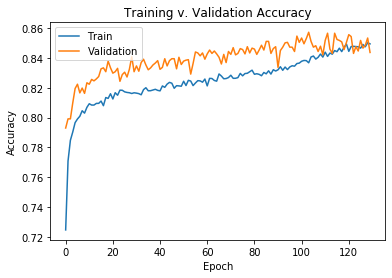

In [12]:
import matplotlib.pyplot as plt

plt.plot(history2.history['acc'])
plt.plot(history2.history['val_acc'])
plt.title('Training v. Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

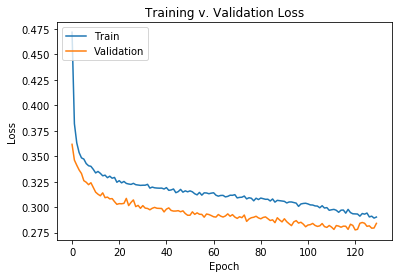

In [13]:
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('Training v. Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [14]:
model.evaluate(X_test, y_test)

774/774 [==============================] - 0s 37us/sample - loss: 0.2910 - acc: 0.8508


[0.2909598571539541, 0.8507752]

In [15]:
from sklearn.metrics import classification_report

#predictions = model.predict(X_test)
Y_test = np.argmax(y_test, axis=1) # Convert one-hot to index
y_pred = model.predict_classes(X_test)
print(classification_report(Y_test, y_pred, target_names=['Rush', 'Pass', 'FG', 'Punt'], digits=4))

              precision    recall  f1-score   support

        Rush     0.7367    0.5847    0.6520       354
        Pass     0.6446    0.7905    0.7102       358
          FG     0.8000    0.8889    0.8421         9
        Punt     0.9773    0.8113    0.8866        53

    accuracy                         0.6990       774
   macro avg     0.7896    0.7689    0.7727       774
weighted avg     0.7113    0.6990    0.6972       774



In [0]:
#model.save('coachingModel7375b.h5')